In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from IPython.core.pylabtools import figsize
import math

plt.style.use('ggplot')

10 	 10


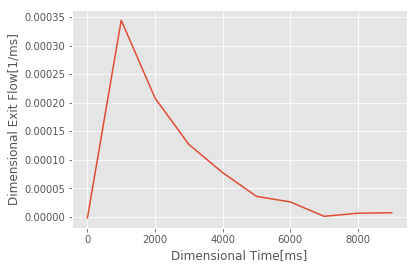

In [2]:
data_file = 'TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat'
data_points = 10
epsilon = 1.0
length = 35.0

def p_n(n):
    return (n+0.5)*np.pi

def r_plus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)+np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def r_minus(p_n, k_a, k_d):
    return ( -(p_n**2 + k_a + k_d)-np.sqrt((p_n**2 + k_a + k_d)**2 - 4*(p_n**2)*k_d) )/2.0

def A_n(p_n, r_plus, r_minus, k_a):
    return (r_plus + (p_n**2) + k_a)/(r_plus - r_minus)

def Flow(diffusivity, k_a, k_d, epsilon, length, time):
    dimensionless_time = time * diffusivity/(epsilon*length**2)
    r_flow = np.zeros(len(time))
    for n in range(100):
        pn = p_n(n); r_p = r_plus(p_n=pn, k_a=k_a, k_d=k_d); r_m = r_minus(p_n=pn, k_a=k_a, k_d=k_d)
        A = A_n(p_n=pn, r_plus=r_p, r_minus=r_m, k_a=k_a)
        r_flow += np.power(-1.0,n)*(2.0*n+1.0)*( A*np.exp(r_m*dimensionless_time)+(1.0-A)*np.exp(r_p*dimensionless_time) )
    r_flow *= np.pi
    r_flow *= diffusivity/(epsilon*np.power(length, 2))

    return r_flow

dimensional_time = np.zeros(data_points)
dimensional_exit_flow = np.zeros(data_points)
i = 0
j = 0
for line in open(data_file, "r"):
    if i%(10000/data_points)==0:
        data = line.split("\t")
        dimensional_time[j] = data[0]
        dimensional_exit_flow[j] = data[1]
        j += 1
    else:
        pass
    i += 1

print(len(dimensional_time), "\t", len(dimensional_exit_flow))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dimensional_time, dimensional_exit_flow)

ax.set_xlabel('Dimensional Time[ms]')
ax.set_ylabel('Dimensional Exit Flow[1/ms]')

plt.show()

## ファイルからの読み込み
```python;title
file_output()
```
* 入力 : file_name, T[mcs], $M$(モデルパラメータ)
* 出力 : $D_e^{(M=0)}, D_e^{(M=1)}, k_a, k_d, \sigma, E, dlogp$, pick, update, exchange rate ($\theta$.shape=(M, T))

In [3]:
def file_output_one(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 3<=l<=model.shape[0]+2:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+5)<=l<=(2*model.shape[0]+4):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+7):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [4]:
def file_output_two(file, T, model):
    
    diffusivity_0 = np.zeros([model.shape[0], T])
    diffusivity_1 = np.zeros([model.shape[0], T])
    k_a = np.zeros([model.shape[0], T])
    k_d = np.zeros([model.shape[0], T])
    sigma_0 = np.zeros([model.shape[0], T])
    E = np.zeros([model.shape[0], T])

    dlogp = np.zeros([model.shape[0], T])
    
    pick = np.zeros([model.shape[0], 5])
    update = np.zeros([model.shape[0], 5])
    exchange_rate = np.zeros(model.shape[0]-1)
    
    l = 0; m = 0; t = 0; m_ = 0
    for line in open(file, "r"):
        data = line.split("\t")
        try :
            tmp = float(data[0])
            if 4<=l<=model.shape[0]+3:
                for i in range(5):
                    pick[m_, i] = float(data[i])
                m_ += 1
            elif (model.shape[0]+6)<=l<=(2*model.shape[0]+5):
                for i in range(5):
                    update[m_, i] = float(data[i])
                m_ += 1
            elif l==(2*model.shape[0]+8):
                for i in range(model.shape[0]-1):
                    exchange_rate[i] = float(data[i])
            else:
                diffusivity_0[m, t] = data[0]
                diffusivity_1[m, t] = data[1]
                k_a[m, t] = data[2]
                k_d[m, t] = data[3]
                sigma_0[m, t] = data[4]
                E[m, t] = data[5]
                dlogp[m, t] = data[6]
                t += 1
        except :
            pass
        else :
            if t==T:
                m += 1
                t = 0
            if m_==model.shape[0]:
                m_ = 0
        finally :
            l += 1
            
    return diffusivity_0, diffusivity_1, k_a, k_d, sigma_0, E, dlogp, pick, update, exchange_rate

In [5]:
read_file_pass = '\\Users\\anbaigashi\\Desktop\\ABC\\2019\\February\\'

time = 51200
Temp = np.array([1, 2, 3, 4, 5], dtype=float)
beta = 1/Temp
print(beta)
model = 0.1*np.arange(0, 11, dtype=float)
model_aida = 0.01*np.arange(60, 71, dtype=float)
print(model)
print(model_aida)

[ 1.          0.5         0.33333333  0.25        0.2       ]
[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[ 0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7 ]


In [6]:
de0_one = ['zero', 'one', 'two', 'three', 'four']
de1_one = ['zero', 'one', 'two', 'three', 'four']
ka_one = ['zero', 'one', 'two', 'three', 'four']
kd_one = ['zero', 'one', 'two', 'three', 'four']
sigma_one = ['zero', 'one', 'two', 'three', 'four']
energy_one = ['zero', 'one', 'two', 'three', 'four']
dlogp_one = ['zero', 'one', 'two', 'three', 'four']
pick_one = ['zero', 'one', 'two', 'three', 'four']
update_one = ['zero', 'one', 'two', 'three', 'four']
exchange_one = ['zero', 'one', 'two', 'three', 'four']

In [7]:
de0_aida = ['zero', 'one', 'two', 'three', 'four']
de1_aida = ['zero', 'one', 'two', 'three', 'four']
ka_aida = ['zero', 'one', 'two', 'three', 'four']
kd_aida = ['zero', 'one', 'two', 'three', 'four']
sigma_aida = ['zero', 'one', 'two', 'three', 'four']
energy_aida = ['zero', 'one', 'two', 'three', 'four']
dlogp_aida = ['zero', 'one', 'two', 'three', 'four']
pick_aida = ['zero', 'one', 'two', 'three', 'four']
update_aida = ['zero', 'one', 'two', 'three', 'four']
exchange_aida = ['zero', 'one', 'two', 'three', 'four']

In [8]:
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=51200mcs_model=0.0-1.0_replica=11_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_one[i], de1_one[i], ka_one[i], kd_one[i], sigma_one[i], energy_one[i], dlogp_one[i], pick_one[i], \
    update_one[i], exchange_one[i] = file_output_one(r_file, time, model)

In [9]:
print(exchange_one)

[array([  4646.,   4094.,   5219.,  12992.,  13208.,  14338.,  18695.,
        11635.,   3455.,   1441.]), array([  5839.,   6442.,   8819.,  10804.,  28787.,  26846.,  19018.,
        18447.,   4222.,   1532.]), array([  3927.,   6309.,   4548.,  11165.,  13635.,  13658.,  13994.,
        11230.,   4449.,   1664.]), array([  8057.,   7125.,  10463.,  11574.,  15216.,  15734.,  13683.,
        11586.,   6774.,   3322.]), array([  4148.,   4733.,  11271.,  14815.,  14350.,  16651.,  14131.,
         7505.,   2875.,   1597.])]


In [10]:
print(energy_one[1].shape)

(11, 51200)


In [11]:
print(energy_one[0])

[[ 23080.57851245  13969.09287846  13969.09287846 ...,    -97.09372525
     -97.09372525    -97.09372525]
 [ 22659.12720247  21834.29594797  22654.66760338 ...,   -106.68273213
    -106.68273136   -106.68273136]
 [ 22243.69968097  22652.43282678  22195.65325119 ...,    -98.79092016
     -98.79092016    -98.65106015]
 ..., 
 [ 19877.63411034  20642.22747992  20997.58165688 ...,    -85.78916636
     -85.6684824     -85.77878207]
 [ 19504.37310829  12932.86596178  19876.15961792 ...,    -95.09299934
     -94.99825688    -94.81573361]
 [ 19137.13589473  19347.38242984  19347.38242984 ...,   -106.4467244
    -106.4467244    -106.36835347]]


C:\Users\anbaigashi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=100.0, right=100.0
  'left=%s, right=%s') % (left, right))


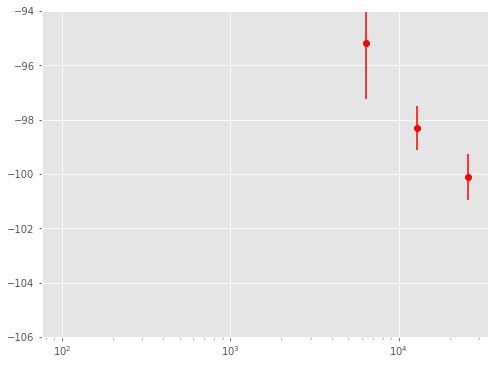

In [36]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xscale('log')

ondo = 2

t_0 = 100
start = t_0
end = 2*start
while start<time:
    bar_A_i = np.zeros(5, dtype=float)
    for i in range(5):
        bar_A_i[i] = energy_one[i][ondo][start:end].mean()
    bar_A = bar_A_i.mean()
#    ax.scatter(start, bar_A, color='red')
#    print(bar_A)
    
    sig = 0.
    for i in range(5):
        sig += (bar_A_i[i]-bar_A)**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    
#    print(sig)
    
    ax.errorbar(start, bar_A, yerr=sig, fmt='o', color='red')
    
    start = end
    end *= 2

    
ax.set_ylim(-106, -94)
plt.show()

In [12]:
for i in range(15945, 15961):
    print(dlogp_one[3][0][i])
#     if dlogp_one[3][0][i] > 100:
#         print(i)

9.50048154614
9.50048154614
9.80368448881
9.80371159782
9.8036138775
9.50760927335
9.50772892191
9.50765942891
9.50782314678
9.50751152219
9.50768502556
9.50768502556
9.50767417876
9.5078619762
9.50840725396
9.18956071645


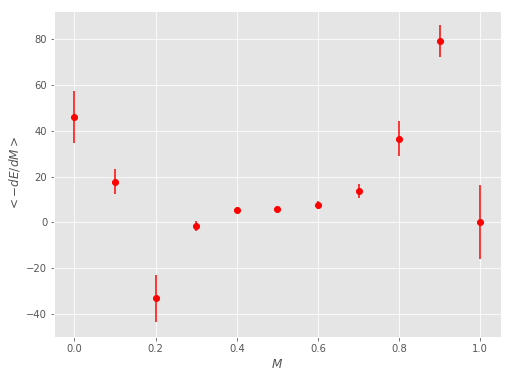

In [84]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

dlogp_m = np.zeros(11, dtype=float)
dlogp_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = dlogp_one[j][i][start:end].mean()
    dlogp_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-dlogp_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    dlogp_s[i] = sig

# sig = 0.
# for i in range(5):
#     sig += (bar_A_i[i]-bar_A)**2
# sig /= (bar_A_i.shape[0]-1)
# sig = np.sqrt(sig)
# sig /= np.sqrt(bar_A_i.shape[0])

# #    print(sig)

ax.errorbar(0.1*np.arange(11, dtype=float), dlogp_m, yerr=dlogp_s, fmt='o', color='red')
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')

#plt.savefig('teireikai_20190227_BayesFactorPath1.png')

plt.show()

In [33]:
from scipy import integrate

bayes_factor_upper_one = integrate.simps(dlogp_m+dlogp_s, 0.1*np.arange(11, dtype=float))
bayes_factor_lower_one = integrate.simps(dlogp_m-dlogp_s, 0.1*np.arange(11, dtype=float))

print(bayes_factor_upper_one)
print(bayes_factor_lower_one)

22.6891476521
13.1521944346


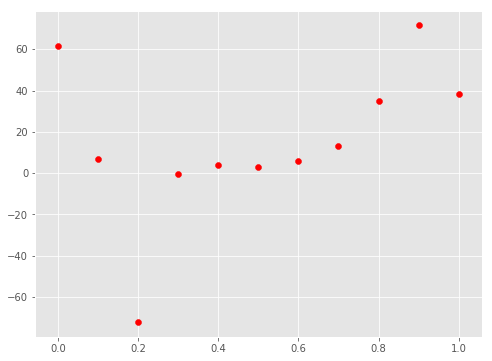

In [49]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
start = 25600
end *= start

dE = np.zeros([5, 11])

for i in range(11):
    dE[0, i] = dlogp_one[0][i, start:end].mean()
    
#print(dE)
ax.scatter(model, dE[0], color='red')
    
plt.show()

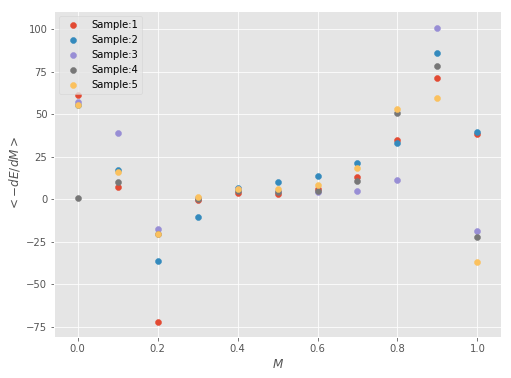

In [85]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
dE = np.zeros([5, 11])

for i in range(5):
    for j in range(11):
        dE[i, j] = dlogp_one[i][j, start:end].mean()
    
    ax.scatter(model, dE[i], color=cycle[i], label='Sample:{}'.format(i+1))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
plt.legend()

#plt.savefig('teireikai_20190227_BayesFactorPath1_fig2.png')
plt.show()

In [51]:
x = np.random.randint(0, 5, 11)

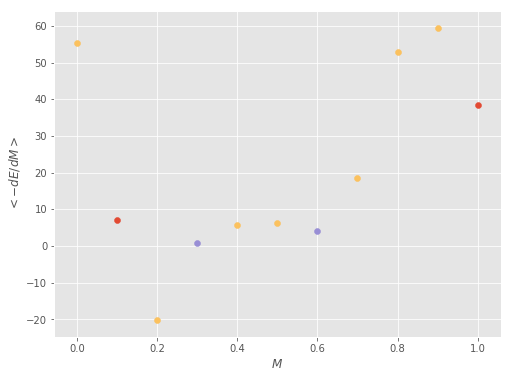

In [52]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i in range(11):
    ax.scatter(model[i], dE[x[i], i], color=cycle[x[i]], label='Sample:{}'.format(x[i]))

ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE/dM>$')
#plt.legend()

#plt.savefig('teireikai_20190220_BayesFactorPath1_fig3.png')
plt.show()

In [53]:
y = np.zeros(11)
for i in range(11):
    y[i] = dE[x[i], i]
print(y)
moment = integrate.simps(y, model)
print(moment)

[ 55.41077475   7.07526454 -20.19926318   0.87105461   5.8316971
   6.20165688   4.23750981  18.43086638  52.88683152  59.37212901
  38.5212648 ]
18.2416491897


In [54]:
N = 10
y = np.zeros([N, 11])
S = np.zeros(N)
for i in range(N):
    x = np.random.randint(0, 5, 11)
    for j in range(11):
        y[i, j] = dE[x[j], j]
    S[i] = integrate.simps(y[i], model)
        
#print(y);print(S)

In [55]:
print(S)
print(S.shape[0])
bar_S = S.mean()
sig_S = 0.
for i in range(N):
    sig_S += (S[i]-bar_S)**2
sig_S /= (S.shape[0]-1)
sig_S = np.sqrt(sig_S)
sig_S /= np.sqrt(S.shape[0])
print(bar_S, sig_S)
print(bar_S-sig_S, bar_S+sig_S)

[ 16.26167005  16.22175415  13.3997473   22.47039151  17.31985171
  14.62159441  12.32022433  15.54480287  17.36483311  22.49680058]
10
16.8021670001 1.07378540529
15.7283815948 17.8759524054


In [59]:
for i in range(5):
    r_file = read_file_pass + 'EM_TAP-sigma_datapoints=10_T=51200mcs_model=0.61-0.6900000000000001_replica=9_koushinhaba-m01p01m1e-6p1e-6_TAP_artificial_data_De=1.5_ka=20_kd=5_sigma=5e-6_1-10^4ms.dat_{}.dat'.format(i)
    de0_aida[i], de1_aida[i], ka_aida[i], kd_aida[i], sigma_aida[i], energy_aida[i], dlogp_aida[i], pick_aida[i], \
    update_aida[i], exchange_aida[i] = file_output_one(r_file, time, model_aida)

In [60]:
print(energy_aida[0].shape)
print(energy_aida[0])

(9, 51200)
[[ 20603.42555153  11242.64267775  11244.24550853 ...,    -84.32022891
     -84.94160814    -84.65417957]
 [ 20564.68386103  20527.4997566   20446.11374047 ...,    -81.22092123
     -84.06222281   -104.09971836]
 [ 20526.00240841  20446.11374047  20603.42555153 ...,    -85.0777453
     -84.2594696     -84.34652004]
 ..., 
 [ 20371.8789768   20452.56324354  20383.32067898 ...,    -86.06097609
    -102.34457143    -86.90332028]
 [ 20333.49871361  20371.8789768   18419.46787058 ...,    -85.61690569
    -103.22385088   -102.34457143]
 [ 20295.1786883   20258.53936706  20249.21277648 ...,   -103.17585361
     -86.45485611   -103.15357366]]


[ 13.88160477   4.22318412   7.26974378   8.85646844   9.99760884
  11.0421804   12.0155061   13.45323169  15.37506846  18.6359146
  21.42595982]


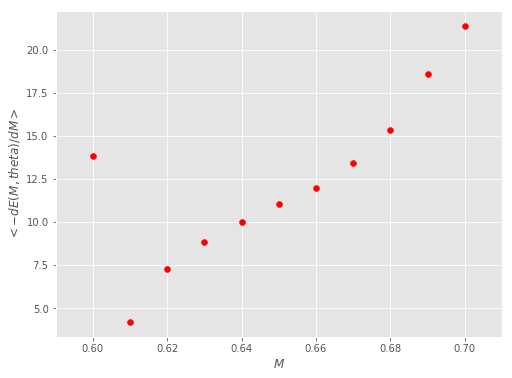

In [69]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

dE = np.zeros([5, 11])

for i in range(11):
    if i==0:
        dE[0, i] = dlogp_one[1][6, start:end].mean()
        dE[0, 10] = dlogp_one[1][7, start:end].mean()
    elif i==10:
        pass
    else:
        dE[0, i] = dlogp_aida[4][i-1, start:end].mean()
    
ax.scatter(0.01*np.arange(60, 71, dtype=float), dE[0], color='red')
print(dE[0])

ax.set_xlim(0.59, 0.71)
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE(M, theta)/dM>$')
    
plt.show()

In [12]:
def energy(model, diffusivity_0, diffusivity_1, k_a, k_d, std,
           epsilon=epsilon, length=length, 
           time=dimensional_time, artificial_flow=dimensional_exit_flow):
    
    Energy = np.square(artificial_flow - ((1.-model)*Flow(diffusivity=diffusivity_0,
                                                     k_a=0., k_d=0.,
                                                     epsilon=epsilon, length=length, 
                                                     time=time) + \
                                          model*Flow(diffusivity=diffusivity_1,
                                                     k_a=k_a, k_d=k_d, 
                                                     epsilon=epsilon, length=length, 
                                                     time=time))
                      ).sum()
    
    Energy *= 1./(2.*std**2)
    Energy += (time.shape[0]/2.) * np.log(2.*np.pi*std**2) 
    
    return Energy


def dlog_p(model, diffusivity_0, diffusivity_1, k_a, k_d, 
           std, time=dimensional_time, artificial_flow=dimensional_exit_flow, 
           epsilon=epsilon, length=length):
    
    dlogp = -1./(std**2) \
            *(
                 (Flow(diffusivity=diffusivity_0, k_a=0, k_d=0, time=time, epsilon=epsilon, length=length) \
                  - Flow(diffusivity=diffusivity_1, k_a=k_a, k_d=k_d, time=time, epsilon=epsilon, length=length)) \
                 *(artificial_flow - (1-model)*Flow(diffusivity=diffusivity_0,
                                                    k_a=0, k_d=0,
                                                    time=time, epsilon=epsilon, length=length) \
                   - model*Flow(diffusivity=diffusivity_1, 
                                k_a=k_a, k_d=k_d, 
                                time=time, epsilon=epsilon, length=length)\
                   )
              ).sum()
           
    return dlogp

In [13]:
%%time

asign = 6
suitei = np.array([0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65])
energy_one_mprime = np.zeros([suitei.shape[0], 25600])
dEnergy_one_mprime = np.zeros([suitei.shape[0], 25600])
for i in range(suitei.shape[0]):
    print(suitei[i])
    for j in range(25600, 51200):
        energy_one_mprime[i, j-25600] = energy(suitei[i], de0_one[0][asign, j], de1_one[0][asign, j], ka_one[0][asign, j], 
                                      kd_one[0][asign, j], sigma_one[0][asign, j])
        dEnergy_one_mprime[i, j-25600] = dlog_p(suitei[i], de0_one[0][asign, j], de1_one[0][asign, j], ka_one[0][asign, j], 
                                      kd_one[0][asign, j], sigma_one[0][asign, j])

0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
Wall time: 48min 33s


In [15]:
print(energy_one_mprime.shape)

(11, 25600)


In [16]:
# dEnergy_Mp = np.exp(-energy_one_mprime+energy_one[0][asign, ])*dEnergy_one_mprime

# print(dEnergy_Mp)
dEnergy_Mp = np.zeros([suitei.shape[0], 25600])
denominator_one = np.zeros([suitei.shape[0], 25600])
for i in range(suitei.shape[0]):
    dEnergy_Mp[i] = np.exp(-energy_one_mprime[i]+energy_one[0][asign, 25600:])*dEnergy_one_mprime[i]
    denominator_one[i] = np.exp(-energy_one_mprime[i]+energy_one[0][asign, 25600:])
    
print(dEnergy_Mp)
#print(denominator_one)

[[  8.22010737e+07   4.94384963e+07   1.08936514e+08 ...,   1.61715737e+08
    3.21083921e+08   1.41202610e+08]
 [  8.21015818e+07   4.84255163e+07   1.10071242e+08 ...,   1.96219033e+08
    3.76188438e+08   1.87317765e+08]
 [  8.07278724e+07   4.67751397e+07   1.10031248e+08 ...,   2.04495463e+08
    3.81474621e+08   2.09318548e+08]
 ..., 
 [  4.43878815e+07   2.39486218e+07   8.18317517e+07 ...,  -2.02456230e+08
   -3.76297382e+08  -2.09164152e+08]
 [  3.42729539e+07   1.83811905e+07   7.25086033e+07 ...,  -1.99690110e+08
   -3.80988299e+08  -1.93005857e+08]
 [  2.34151479e+07   1.25042853e+07   6.20602906e+07 ...,  -1.68280633e+08
   -3.32096175e+08  -1.49226069e+08]]


In [17]:
hoge = np.zeros([suitei.shape[0], 11])
for i in range(suitei.shape[0]):
    for j in np.arange(11):
        hoge[i, j] = np.exp(-energy_one_mprime[i, j]+energy_one[0][asign, 25600+j])*dEnergy_one_mprime[i, j]
        
print(hoge)

[[  8.22010737e+07   4.94384963e+07   1.08936514e+08   1.35376568e+08
    8.23577591e+07   4.06383828e+07   5.33138462e-03   5.98008899e-03
    6.23309891e+06   3.56710394e+07   4.76526882e+07]
 [  8.21015818e+07   4.84255163e+07   1.10071242e+08   1.37767525e+08
    8.27426720e+07   4.32656232e+07   5.62048015e-03   6.30671517e-03
    6.63653931e+06   3.79563010e+07   4.99189998e+07]
 [  8.07278724e+07   4.67751397e+07   1.10031248e+08   1.38781022e+08
    8.23573782e+07   4.57076945e+07   5.90702375e-03   6.63064329e-03
    7.01101795e+06   4.00819539e+07   5.18849594e+07]
 [  7.80082094e+07   4.44769116e+07   1.08726740e+08   1.38288037e+08
    8.11549235e+07   4.79030980e+07   6.18877879e-03   6.94934741e-03
    7.34696541e+06   4.19954110e+07   5.34902777e+07]
 [  7.39065664e+07   4.15349741e+07   1.06090219e+08   1.36183839e+08
    7.91009590e+07   4.97891941e+07   6.46337375e-03   7.26014677e-03
    7.63464372e+06   4.36431038e+07   5.46765542e+07]
 [  6.84266123e+07   3.7968762

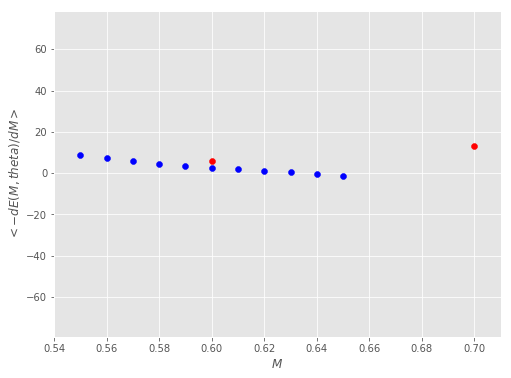

In [21]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

dE = np.zeros([5, 11])
start = 25600
end = 2*start

for i in range(11):
    dE[0, i] = dlogp_one[0][i, start:end].mean()
    
ax.scatter(model, dE[0], color='red')
for i in range(suitei.shape[0]):
    ax.scatter(suitei[i], dEnergy_Mp[i, ].mean()/denominator_one[i, ].mean(), color='blue')

ax.set_xlim(0.54, 0.71)
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE(M, theta)/dM>$')
    
plt.show()

In [14]:
%%time

asign = 7
suitei_two = np.array([0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75])
energy_one_mprime2 = np.zeros([suitei.shape[0], 25600])
dEnergy_one_mprime2 = np.zeros([suitei.shape[0], 25600])
for i in range(suitei.shape[0]):
    print(suitei_two[i])
    for j in range(25600, 51200):
        energy_one_mprime2[i, j-25600] = energy(suitei[i], de0_one[0][asign, j], de1_one[0][asign, j], ka_one[0][asign, j], 
                                      kd_one[0][asign, j], sigma_one[0][asign, j])
        dEnergy_one_mprime2[i, j-25600] = dlog_p(suitei[i], de0_one[0][asign, j], de1_one[0][asign, j], ka_one[0][asign, j], 
                                      kd_one[0][asign, j], sigma_one[0][asign, j])

0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
Wall time: 48min 18s


In [22]:
# dEnergy_Mp = np.exp(-energy_one_mprime+energy_one[0][asign, ])*dEnergy_one_mprime

# print(dEnergy_Mp)
asign = 7

dEnergy_Mp2 = np.zeros([suitei_two.shape[0], 25600])
denominator_two = np.zeros([suitei_two.shape[0], 25600])
for i in range(suitei_two.shape[0]):
    dEnergy_Mp2[i] = np.exp(-energy_one_mprime2[i]+energy_one[0][asign, 25600:])*dEnergy_one_mprime2[i]
    denominator_two[i] = np.exp(-energy_one_mprime2[i]+energy_one[0][asign, 25600:])
    
print(dEnergy_Mp2)

[[ 0.0306902   0.03098511  0.02970985 ...,  0.06707686  0.41926177
   0.06530983]
 [ 0.05544918  0.05595565  0.0537643  ...,  0.09124658  0.51131057
   0.08886693]
 [ 0.09857195  0.09942091  0.09574516 ...,  0.12324943  0.61996108
   0.12007968]
 ..., 
 [ 2.20893614  2.21889059  2.17551679 ...,  0.64437108  1.74088544
   0.63054377]
 [ 3.50170382  3.5145023   3.45864769 ...,  0.82780294  2.02492532
   0.81092486]
 [ 5.45976776  5.47480471  5.40905407 ...,  1.05575574  2.3409799
   1.03547178]]


In [23]:
hoge = np.zeros([suitei_two.shape[0], 11])
for i in range(suitei_two.shape[0]):
    for j in np.arange(11):
        hoge[i, j] = np.exp(-energy_one_mprime2[i, j]+energy_one[0][asign, 25600+j])*dEnergy_one_mprime2[i, j]
        
print(hoge)

[[  3.06902002e-02   3.09851140e-02   2.97098455e-02   2.95928016e-02
    2.81411649e-02   2.28234370e-02   2.40381167e-02   2.20208509e-02
    4.96555275e-06   2.19952036e-02   2.17073571e-02]
 [  5.54491829e-02   5.59556490e-02   5.37643021e-02   5.35624607e-02
    5.11711182e-02   4.23138155e-02   4.43527894e-02   4.09578527e-02
    1.20669621e-05   4.09145487e-02   4.04038465e-02]
 [  9.85719488e-02   9.94209142e-02   9.57451619e-02   9.54053848e-02
    9.15584166e-02   7.71550405e-02   8.04959825e-02   7.49188083e-02
    2.87280074e-05   7.48474449e-02   7.39634159e-02]
 [  1.72408728e-01   1.73795825e-01   1.67785460e-01   1.67227888e-01
    1.61193567e-01   1.38360756e-01   1.43696362e-01   1.34766112e-01
    6.70008517e-05   1.34651498e-01   1.33160512e-01]
 [  2.96685680e-01   2.98890595e-01   2.89328191e-01   2.88437896e-01
    2.79227103e-01   2.44012698e-01   2.52301604e-01   2.38391678e-01
    1.53077643e-04   2.38212634e-01   2.35766893e-01]
 [  5.02282099e-01   5.0568333

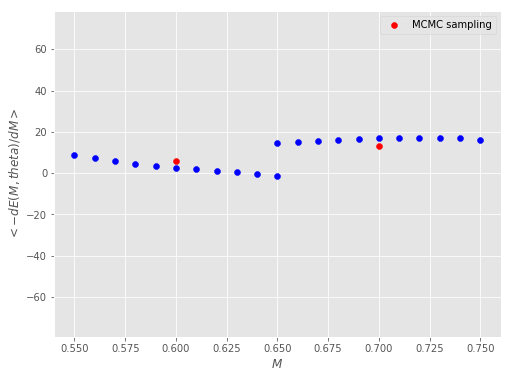

In [53]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

dE = np.zeros([5, 11])

for i in range(11):
    dE[0, i] = dlogp_one[0][i, start:end].mean()
    
ax.scatter(model, dE[0], color='red', label='MCMC sampling')
for i in range(suitei.shape[0]):
    ax.scatter(suitei[i], dEnergy_Mp[i, ].mean()/denominator_one[i, ].mean(), color='blue')
    ax.scatter(suitei_two[i], dEnergy_Mp2[i, ].mean()/denominator_two[i, ].mean(), color='blue')

ax.set_xlim(0.54, 0.76)
ax.set_xlabel('$M$')
ax.set_ylabel('$<-dE(M, theta)/dM>$')
plt.legend()
    
#plt.savefig('teireikai_20190227_BayesFactorPath1_suitei_fig2.png')
plt.show()

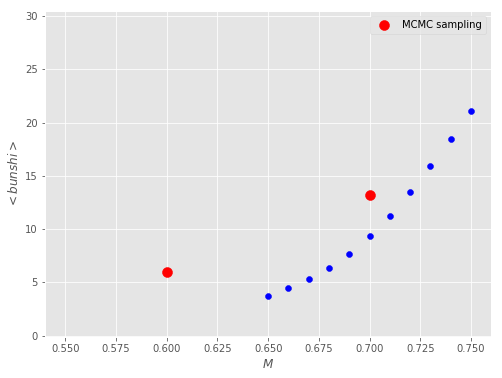

In [66]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

dE = np.zeros([5, 11])

for i in range(11):
    dE[0, i] = dlogp_one[0][i, start:end].mean()
    
ax.scatter(model, dE[0], color='red', s=100, label='MCMC sampling')
for i in range(suitei.shape[0]):
    ax.scatter(suitei[i], dEnergy_Mp[i, ].mean(), color='blue')
    ax.scatter(suitei_two[i], dEnergy_Mp2[i, ].mean(), color='blue')

ax.set_xlim(0.54, 0.76)
ax.set_ylim(-0.1, 30.5)
ax.set_xlabel('$M$')
ax.set_ylabel('$<bunshi>$')
plt.legend()
    
#plt.savefig('teireikai_20190227_BayesFactorPath1_suitei_fig3-2.png')
plt.show()

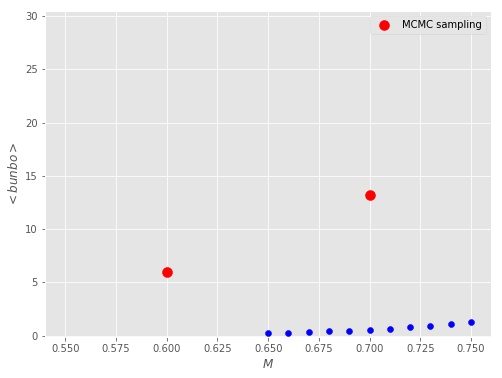

In [64]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

dE = np.zeros([5, 11])

for i in range(11):
    dE[0, i] = dlogp_one[0][i, start:end].mean()
    
ax.scatter(model, dE[0], color='red', s=100, label='MCMC sampling')
for i in range(suitei.shape[0]):
    ax.scatter(suitei[i], denominator_one[i, ].mean(), color='blue')
    ax.scatter(suitei_two[i], denominator_two[i, ].mean(), color='blue')

ax.set_xlim(0.54, 0.76)
ax.set_ylim(-0.1, 30.5)
ax.set_xlabel('$M$')
ax.set_ylabel('$<bunbo>$')
plt.legend()
    
#plt.savefig('teireikai_20190227_BayesFactorPath1_suitei_fig4-2.png')
plt.show()

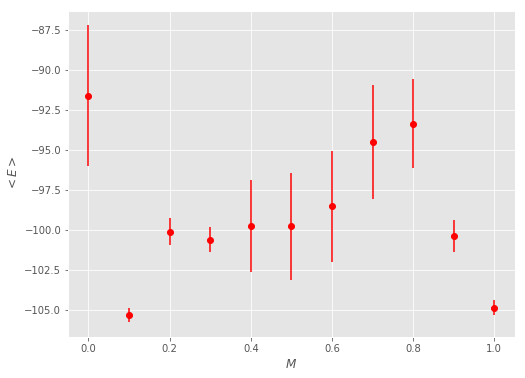

In [45]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

start = 25600
end = 2*start

energy_m = np.zeros(11, dtype=float)
energy_s = np.zeros(11, dtype=float)

for i in range(11):
    bar_A_i = np.zeros(5, dtype=float)
    for j in range(5):
        bar_A_i[j] = energy_one[j][i][start:end].mean()
    energy_m[i] = bar_A_i.mean()
    
    sig = 0.
    for j in range(5):
        sig += (bar_A_i[j]-energy_m[i])**2
    sig /= (bar_A_i.shape[0]-1)
    sig = np.sqrt(sig)
    sig /= np.sqrt(bar_A_i.shape[0])
    energy_s[i] = sig

# sig = 0.
# for i in range(5):
#     sig += (bar_A_i[i]-bar_A)**2
# sig /= (bar_A_i.shape[0]-1)
# sig = np.sqrt(sig)
# sig /= np.sqrt(bar_A_i.shape[0])

# #    print(sig)

ax.errorbar(0.1*np.arange(11, dtype=float), energy_m, yerr=energy_s, fmt='o', color='red')
ax.set_xlabel('$M$')
ax.set_ylabel('$<E>$')

#plt.savefig('teireikai_20190227_EnergyPath1.png')

plt.show()

In [44]:
print(energy_m)

[ -91.59473352 -105.32980789 -100.11880959 -100.60902854  -99.74505099
  -99.76475704  -98.50869333  -94.49998953  -93.34722249 -100.37039882
 -104.85958689]


In [96]:
model = 0.1*np.arange(0, 11, dtype=float)
sitei = 4
for i in range(11):
    print(model[i], energy(model[i], de0_one[sitei][i][25600:].mean(), de1_one[sitei][i][25600:].mean(),
                           ka_one[sitei][i][25600:].mean(), kd_one[sitei][i][25600:].mean(), sigma_one[sitei][i][25600:].mean()))

0.0 -96.3619978471
0.1 -106.714486025
0.2 -97.572888821
0.3 -94.3658297874
0.4 -72.7353993375
0.5 4.69318289981
0.6 -26.0822654822
0.7 -87.0475876435
0.8 -92.9331035039
0.9 -102.909109397
1.0 -105.031746701


In [97]:
for i in range(11):
    print(energy_one[sitei][i][25600:].mean())

-95.5922704591
-105.73354836
-99.4173741109
-100.631826643
-102.32705164
-103.191843212
-100.895374439
-89.3506197225
-91.9694398627
-103.194075779
-104.180620835


In [98]:
print(energy(model[2], de0_one[0][2][10], de1_one[0][2][10], ka_one[0][2][10], kd_one[0][2][10], sigma_one[0][2][10]))
print(energy_one[0][2][10])

13459.6024597
13459.6024597
